## 第三章 模型搭建和评估-评估

根据之前的模型的建模，我们知道如何运用sklearn这个库来完成建模，以及我们知道了的数据集的划分等等操作。那么一个模型我们怎么知道它好不好用呢？以至于我们能不能放心的使用模型给我的结果呢？那么今天的学习的评估，就会很有帮助。

加载下面的库

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (10, 6)  # 设置输出图片大小

**任务：加载数据并分割测试集和训练集**

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# 一般先取出X和y后再切割，有些情况会使用到未切割的，这时候X和y就可以用,x是清洗好的数据，y是我们要预测的存活数据'Survived'
data = pd.read_csv('clear_data.csv')
train = pd.read_csv('train.csv')
X = data
y = train['Survived']

In [7]:
# 对数据集进行切割
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [ ]:
# 默认参数逻辑回归模型
lr = LogisticRegression()
lr.fit(X_train, y_train)

### 模型评估

* 模型评估是为了知道模型的泛化能力。
* 交叉验证（cross-validation）是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定、全面。
* 在交叉验证中，数据被多次划分，并且需要训练多个模型。
* 最常用的交叉验证是 k 折交叉验证（k-fold cross-validation），其中 k 是由用户指定的数字，通常取 5 或 10。
* 准确率（precision）度量的是被预测为正例的样本中有多少是真正的正例(被报告的真阳/报告阳)
* 召回率（recall）度量的是正类样本中有多少被预测为正类(被报告的真阳/真阳)
* f-分数是准确率与召回率的调和平均

【思考】：将上面的概念进一步的理解，大家可以做一下总结
* 我们一般会把数据分成训练集, 验证集, 测试集, 这会导致一些弊端: 最终训练得到的模型受到划分数据的影响, 也就是说训练集的数据分布于全部数据分布并不相同; 数据量减少, 信息缺失, 容易导致过拟合等问题.
* k折交叉验证通过对k个不同分组训练的结果进行平均来减少方差, 因此模型的性能对数据的划分就不那么敏感
    * 1. 不重复抽样将原始数据随机分为k份
    * 2. 每次将1份作为测试集, 其他作为训练集
    * 3. 重复第二步k次, 这样每个子集都有一次机会作为测试集
    * 4. 在每个训练集上训练后得到一个模型, 用这个模型在相应的测试集上测试, 计算并保存模型的评估指标(比如MSE)
    * 5. 计算k组测试结果的平均值作为模型精度的估计, 并作为当前k折交叉验证下模型的性能指标
* 一般k=10, 随着k增大, 评估指标之间接近LOOCV(k=数据量的情况), 但计算量明显小于LOOCV

#### 任务一：交叉验证
* 用10折交叉验证来评估之前的逻辑回归模型
* 计算交叉验证精度的平均值

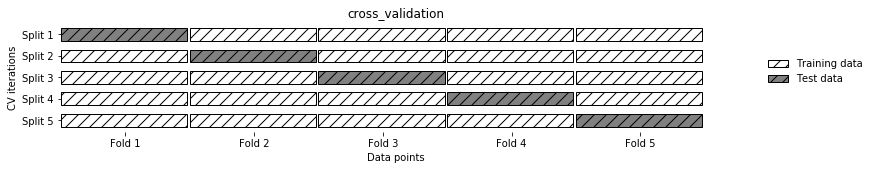

In [13]:
#提示：交叉验证
Image('Snipaste_2020-01-05_16-37-56.png')

#### 提示4
* 交叉验证在sklearn中的模块为`sklearn.model_selection`

In [9]:
from sklearn.model_selection import cross_val_score

In [ ]:
lr = LogisticRegression(C=100)
scores = cross_val_score(lr, X_train, y_train, cv=10)

In [13]:
# k折交叉验证分数
print(scores)
# 平均交叉验证分数
print("Average cross-validation score: {:.2f}".format(scores.mean()))

[0.85074627 0.74626866 0.74626866 0.80597015 0.88059701 0.8358209
 0.76119403 0.8358209  0.74242424 0.75757576]
Average cross-validation score: 0.80


#### 思考4
k折越多的情况下会带来什么样的影响？
* 优点: 训练集占全部数据的比例大, 降低训练集数据分布的影响
* 缺点: 计算的模型数量增加了

#### 任务二：混淆矩阵
* 计算二分类问题的混淆矩阵
* 计算精确率、召回率以及f-分数

【思考】什么是二分类问题的混淆矩阵，理解这个概念，知道它主要是运算到什么任务中的
* 准确率（precision）度量的是被预测为正例的样本中有多少是真正的正例
    * 被报告的真阳(TP)/报告阳(TP+FP)
* 召回率（recall）度量的是正类样本中有多少被预测为正类
    * 被报告的真阳(TP)/真阳(TP+FN)
* f-分数是准确率与召回率的调和平均

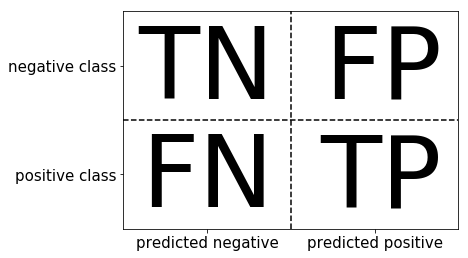

In [20]:
#提示：混淆矩阵
Image('Snipaste_2020-01-05_16-38-26.png')

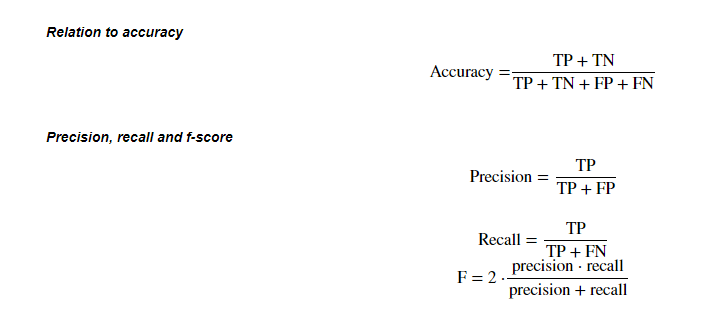

In [21]:
#提示：准确率 (Accuracy),精确度（Precision）,Recall,f-分数计算方法
Image('Snipaste_2020-01-05_16-39-27.png')

#### 提示5
* 混淆矩阵的方法在sklearn中的`sklearn.metrics`模块
* 混淆矩阵需要输入真实标签和预测标签
* 精确率、召回率以及f-分数可使用`classification_report`模块

In [14]:
from sklearn.metrics import confusion_matrix

In [ ]:
# 训练模型
lr = LogisticRegression(C=100)
lr.fit(X_train, y_train)

In [16]:
# 模型预测结果
pred = lr.predict(X_train)

In [17]:
# 混淆矩阵
confusion_matrix(y_train, pred)

array([[354,  58],
       [ 83, 173]])

In [18]:
from sklearn.metrics import classification_report

In [19]:
# 精确率、召回率以及f1-score
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       412
           1       0.75      0.68      0.71       256

    accuracy                           0.79       668
   macro avg       0.78      0.77      0.77       668
weighted avg       0.79      0.79      0.79       668



【思考】
* 如果自己实现混淆矩阵的时候该注意什么问题

#### 任务三：ROC曲线
* 绘制ROC曲线

【思考】什么是ROC曲线，ROC曲线的存在是为了解决什么问题？
* ROC曲线（Receiver Operating Characteristic curve）是一种用于评估二元分类模型的工具。它显示了模型的敏感性和特异性之间的折中关系。ROC曲线的存在是为了解决分类器在不同阈值下的性能问题。
* ROC曲线是通过将分类阈值调整到不同水平来评估分类器性能的。在每个阈值下，模型会产生一组真正例率（又称敏感性）和假正例率（又称特异性）的数据点。将这些数据点画在坐标系上，就得到了ROC曲线。ROC曲线越靠近左上角，说明分类器性能越好。
* 通常，ROC曲线下面积（AUC）越大，分类器性能越好。AUC为1表示完美分类器，AUC为0.5表示随机分类器。

#### 提示6
* ROC曲线在sklearn中的模块为`sklearn.metrics`
* ROC曲线下面所包围的面积越大越好

In [20]:
from sklearn.metrics import roc_curve

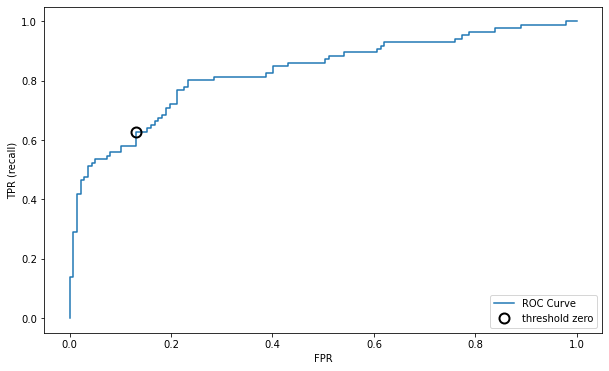

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4);

#### 思考6
对于多分类问题如何绘制ROC曲线
* 一种方法是对于每一类，将其与其他类别组成二元分类问题，然后分别绘制 ROC 曲线。这样会得到若干条 ROC 曲线，称为“独立 ROC 曲线”。这种方法比较简单，但是它忽略了类别之间的关系。

【思考】你能从这条ROC曲线的到什么信息？这些信息可以做什么？
* 在ROC曲线上，点(0,1)表示完全正确的分类器，点(1,0)表示完全错误的分类器。因此,越靠近左上角的点,说明分类器效果越好. 曲线下面积(AUC)越大，说明分类器性能越好。
* 通过使用ROC曲线，我们可以评估分类器的性能，并选择最优的阈值来使用分类器。还可以比较不同分类器的性能。